In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

%matplotlib inline

1 (из методички). Сгенерировать датасет при помощи `sklearn.datasets.make_regression` и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [2]:
data, target, coef = make_regression(n_samples=3000,
                                     n_features=2,
                                     n_informative=2,
                                     n_targets=1,
                                     noise=5,
                                     coef=True,
                                     random_state=21)

In [3]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
def eval_model(X, y, iterations, alpha=1e-4):
    
    error_array = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations+1):
        
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        error_array.append([i, err])
        
        if i % (iterations / 10) == 0:
                print(i, W, err)
                
    return W, np.array(error_array)

In [5]:
def eval_sgd_model(X, y, iterations, qty_in_batch, alpha=1e-4):
    
    error_array = []
    error_array_by_batch = []
    k = 0
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    n_batch = n // qty_in_batch
    
    if n % qty_in_batch != 0:
        n_batch += 1
        
    for i in range(1, iterations+1):
        
        for b in range(n_batch):
            
            start_ = qty_in_batch*b
            end_ = qty_in_batch*(b+1)
            # print(b, n_batch, start_, end_)

            X_tmp = X[:, start_ : end_]
            y_tmp = y[start_ : end_]
            y_pred_tmp = np.dot(W, X_tmp)
            err = calc_mse(y_tmp, y_pred_tmp)
            W -= (alpha * (1/n * 2 * np.dot((y_pred_tmp - y_tmp), X_tmp.T)))
            k += 1
            error_array_by_batch.append([k, err])
            
        error_array.append([i, err])
            
        if i % (iterations / 10) == 0:
            print(i, W, err)

    return W, np.array(error_array), np.array(error_array_by_batch)

In [6]:
W_gd, errors_gd = eval_model(data.T, target, iterations=30000, alpha=1e-4)

3000 [ 5.74089532 42.18262917] 2481.4734400399702
6000 [ 8.54877851 64.64781796] 715.3512370394094
9000 [10.02158304 76.55690743] 219.19613614096383
12000 [10.79344555 82.87015351] 79.81073655723996
15000 [11.19758229 86.2169781 ] 40.652720925831375
18000 [11.40896568 87.99124799] 29.6518225372439
21000 [11.5194049  88.93186616] 26.561240235089954
24000 [11.5770332  89.43053759] 25.69296415378505
27000 [11.60706298 89.69491453] 25.449025003362
30000 [11.62268754 89.83508004] 25.380490035063787


In [7]:
W_sgd, errors_sgd, errors_batchs = eval_sgd_model(data.T, target, iterations=30000, qty_in_batch=50, alpha=1e-4)

3000 [ 5.99099355 42.82048319] 1959.6890182047805
6000 [ 8.68692297 64.98341245] 556.5562941900546
9000 [10.09798184 76.73343503] 170.32836776064113
12000 [10.8357471  82.96298859] 66.07518126652583
15000 [11.22103138 86.26578874] 39.04983465786692
18000 [11.42197859 88.01690635] 32.65967869562619
21000 [11.5266338  88.94535207] 31.502430005079795
24000 [11.58105276 89.43762558] 31.51565491257114
27000 [11.60929978 89.69864078] 31.698736105306963
30000 [11.62393296 89.83704048] 31.845238459063562


__Построим графики среднеквадратичной ошибки в зависимости от количества итераций для обычного и стохастического градиентных спусков (для стохастического примем за одну итерацию проход по всем "батчам").__

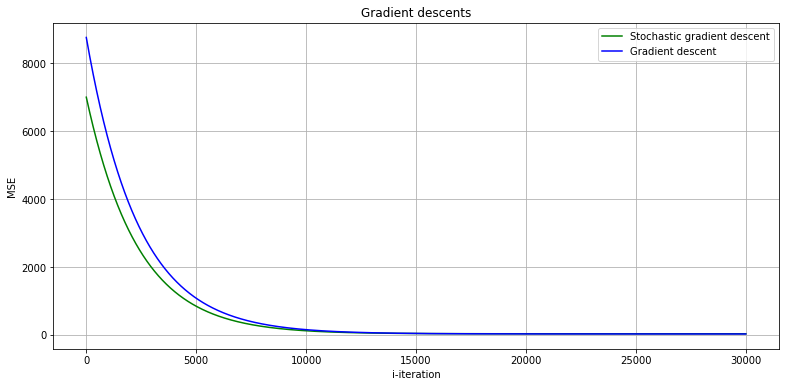

In [8]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descents')
plt.xlabel('i-iteration')
plt.ylabel('MSE')

plt.plot(errors_sgd[:, 0], errors_sgd[:, 1], c='g')
plt.plot(errors_gd[:, 0], errors_gd[:, 1], c='b')

plt.legend(labels=['Stochastic gradient descent', 'Gradient descent'])
plt.grid()

plt.show()

__Построим графики среднеквадратичной ошибки в зависимости от количества итераций для обычного и стохастического градиентных спусков (для стохастического примем за одну итерацию проход по одному "батчу"), шкала Ox логарифмическая.__

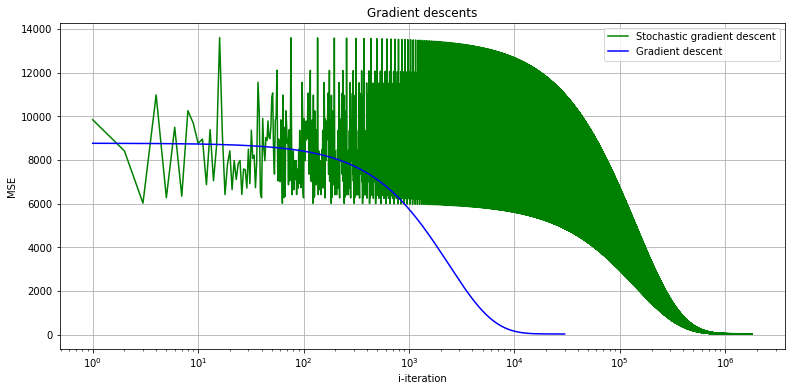

In [9]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descents')
plt.xlabel('i-iteration')
plt.ylabel('MSE')

plt.plot(errors_batchs[:, 0], errors_batchs[:, 1], c='g')
plt.plot(errors_gd[:, 0], errors_gd[:, 1], c='b')

plt.xscale('log')
plt.legend(labels=['Stochastic gradient descent', 'Gradient descent'])
plt.grid()

plt.show()

__Построим график среднеквадратичной ошибки в зависимости от количества итераций по "батчам" для стохастического градиентного спуска для первых 1000 итераций.__

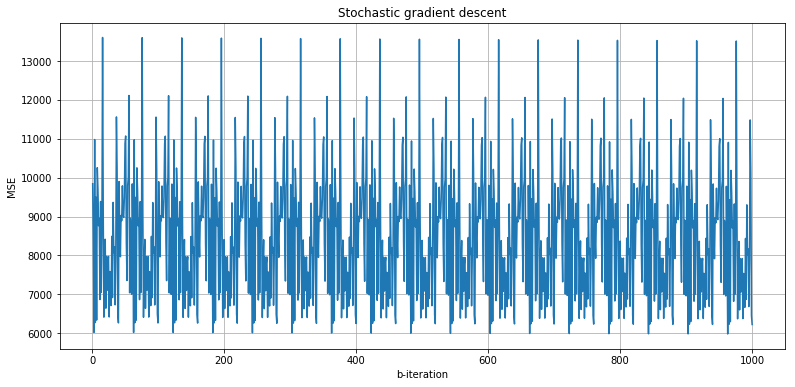

In [10]:
plt.figure(figsize=(13, 6))
plt.title('Stochastic gradient descent')
plt.xlabel('b-iteration')
plt.ylabel('MSE')

plt.plot(errors_batchs[0:1000, 0], errors_batchs[0:1000, 1])
plt.grid()

plt.show()

"Обычный" и стохастический градиентные спуски имеют примерно одинаковую сходимость за определенное количество итераций, если принять в стохастическом за одну итерацию проход по всем "батчам", если же учитывать все итерации, то стохастический градиентный спуск сходится на несколько порядков итераций больше, чем "обычный", на эту скорость влияет количество наблюдений в каждом "батче".

1. Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [11]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8, log=True):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0 and log:
            print(i, W, err)
    return W

In [12]:
def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [13]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 
               1, 3, 3, 1, 2]])

In [14]:
y = [45, 55, 50, 59, 65,
    35, 75, 80, 50, 60]

In [15]:
X_st = X.copy().astype(np.float64)

X_st[1] = calc_std_feat(X[1])
X_st[2] = calc_std_feat(X[2])
X_st[3] = calc_std_feat(X[3])

In [16]:
lambda_array = np.logspace(-12, 2, 50)

W_df = pd.DataFrame(np.array([eval_model_reg2(X_st, 
                                              y, 
                                              iterations=5000, 
                                              alpha=1e-2, 
                                              lambda_=itm, 
                                              log=False) for itm in lambda_array]),
                    index=lambda_array,
                    columns=['w_' + str(itm)for itm in range(1, X_st.shape[0]+1)])

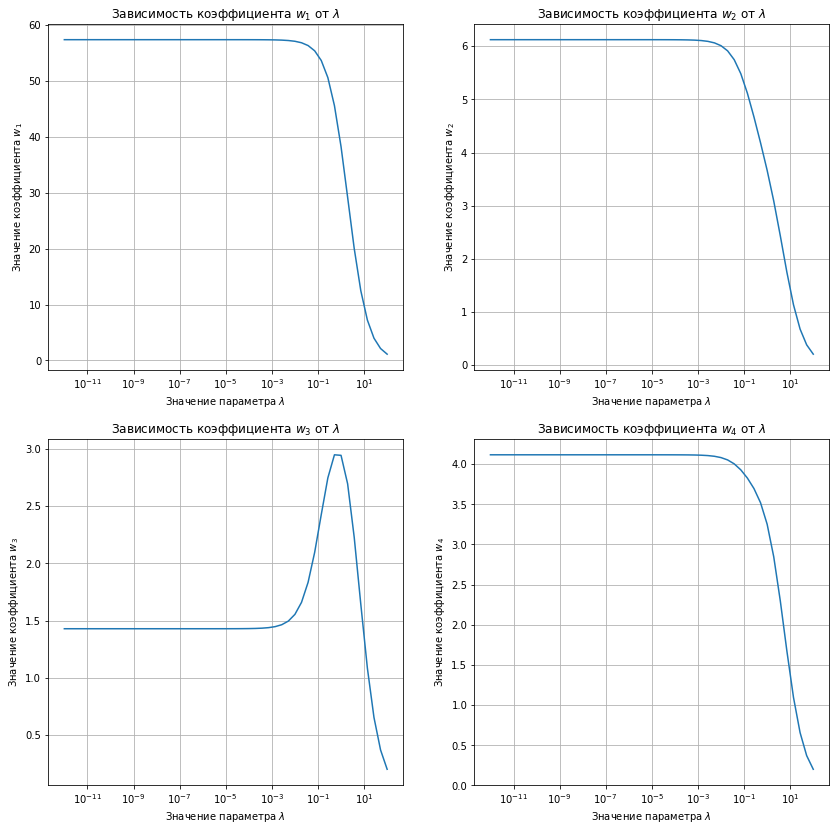

In [17]:
fig, ax = plt.subplots(2, 2)
fig.set_size_inches(14, 14, forward=True)

for ax_i, coef in zip(ax.flatten(), W_df.columns):
    ax_i.plot(W_df[coef])
    ax_i.set_title(r'Зависимость коэффициента $' + coef + '$ от $\lambda$')
    ax_i.set_xscale('log')
    ax_i.grid()
    ax_i.set_xlabel(r'Значение параметра $\lambda$')
    ax_i.set_ylabel('Значение коэффициента ' + r'$' + coef + '$')

2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применение нормализации и стандартизации к признаку равносильно применению только стандартизации, так же как и применение их в другом порядке равносильно применению только нормализации. 

Нормализация уменьшает масштаб признака, а стандартизация показывает взаимосвязь значений признака, и от уменьшения масштаба взаимосвязи останутся теми же.

3*. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [18]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8, log=True):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_/2 * W/np.abs(W)) 
        if i % (iterations / 10) == 0 and log:
            print(i, W, err)
    return W

In [19]:
eval_model_reg1(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-4)

100 [49.85348982  3.66667278  3.48290021  4.46268208] 100.15366152011755
200 [56.39916349  4.16740442  3.16667541  4.31347221] 41.52197492599457
300 [57.26724782  4.55529065  2.89027122  4.20487976] 40.25689509644161
400 [57.38237278  4.86306387  2.65690445  4.13290614] 40.08337552073677
500 [57.3976406   5.10793351  2.46012679  4.08692802] 39.98154887503836
600 [57.39966541  5.3032643   2.29437096  4.05918053] 39.914689917027644
700 [57.39993394  5.45948042  2.15487284  4.04403553] 39.87030461711918
800 [57.39996956  5.58473183  2.0375674   4.03743851] 39.840622267508564
900 [57.39997428  5.68540604  1.93899468  4.03649015] 39.820644545758604
1000 [57.3999749   5.76652174  1.85621614  4.03913605] 39.80712279096825


array([57.3999749 ,  5.76652174,  1.85621614,  4.03913605])

In [20]:
eval_model_reg2(X_st, y, iterations=1000, alpha=1e-2, lambda_=1e-4)

100 [49.85179222  3.6666544   3.48286113  4.46256   ] 100.17955368352575
200 [56.39657288  4.16736645  3.16668449  4.31331684] 41.52726306452612
300 [57.26445022  4.55519765  2.89034917  4.20470966] 40.257697089017704
400 [57.37953599  4.86289501  2.65706344  4.13272988] 40.08355545217999
500 [57.39479705  5.10767868  2.46037345  4.08674902] 39.981664122534156
600 [57.39682076  5.30292047  2.2947078   4.05899928] 39.914807152365476
700 [57.39708912  5.45904909  2.15529935  4.04385104] 39.870425823995134
800 [57.3971247   5.58421728  2.0380809   4.03724921] 39.84074270879641
900 [57.39712942  5.68481409  1.93959104  4.03629439] 39.82076025072865
1000 [57.39713005  5.765859    1.85689028  4.03893236] 39.80723120406397


array([57.39713005,  5.765859  ,  1.85689028,  4.03893236])